<a href="https://colab.research.google.com/github/ashish807/Predict-Job-Title-and-skills/blob/main/Job_and_Skills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ability1=pd.read_excel("/content/drive/My Drive/datasets/Dataset/Abilities to Work Activities.xlsx")


In [ ]:
ability1 = ability1.rename(columns={"Abilities Element Name":"ElementName", "Work Activities Element Name":"Descriptions"})

In [ ]:
ability2 =pd.read_excel("/content/drive/My Drive/datasets/Dataset/Abilities to Work Context.xlsx")

In [ ]:
ability2 = ability2[["Abilities Element Name","Work Context Element Name"]]

In [ ]:
ability2 =ability2.rename(columns={"Abilities Element Name":"ElementName","Work Context Element Name":"Descriptions"})

Concatanation of Two xlsx files ability1 and ability2 

In [ ]:
abilityConcat = pd.concat([ability1,ability2])

In [ ]:
abilityConcat = abilityConcat[["ElementName","Descriptions"]]

In [ ]:
abilityConcat

,ElementName,Descriptions
0,Oral Comprehension,Getting Information
1,Oral Comprehension,"Monitor Processes, Materials, or Surroundings"
2,Oral Comprehension,"Identifying Objects, Actions, and Events"
3,Oral Comprehension,"Judging the Qualities of Things, Services, or ..."
4,Oral Comprehension,Processing Information
...,...,...
134,Speech Clarity,Responsible for Others' Health and Safety
135,Speech Clarity,Responsibility for Outcomes and Results
136,Speech Clarity,Frequency of Conflict Situations
137,Speech Clarity,Deal With Unpleasant or Angry People


In [ ]:
abilities = pd.read_excel("/content/drive/My Drive/datasets/Dataset/Abilities.xlsx")

In [ ]:
abilities= abilities.rename(columns={"Element Name":"ElementName","Data Value":"DataValue"})

In [ ]:
abilities=abilities[["Title","ElementName","DataValue"]]

In [ ]:
abilities

,Title,ElementName,DataValue
0,Chief Executives,Oral Comprehension,4.50
1,Chief Executives,Oral Comprehension,4.88
2,Chief Executives,Written Comprehension,4.25
3,Chief Executives,Written Comprehension,4.62
4,Chief Executives,Oral Expression,4.38
...,...,...,...
100667,"Tank Car, Truck, and Ship Loaders",Sound Localization,2.00
100668,"Tank Car, Truck, and Ship Loaders",Speech Recognition,3.12
100669,"Tank Car, Truck, and Ship Loaders",Speech Recognition,2.75
100670,"Tank Car, Truck, and Ship Loaders",Speech Clarity,3.12


Unique Element Names

In [ ]:
name1 = list(abilities["ElementName"])
name_arr1 = np.array(name1)
final_name1 =list(np.unique(name_arr1))
final_name1

['Arm-Hand Steadiness',
 'Auditory Attention',
 'Category Flexibility',
 'Control Precision',
 'Deductive Reasoning',
 'Depth Perception',
 'Dynamic Flexibility',
 'Dynamic Strength',
 'Explosive Strength',
 'Extent Flexibility',
 'Far Vision',
 'Finger Dexterity',
 'Flexibility of Closure',
 'Fluency of Ideas',
 'Glare Sensitivity',
 'Gross Body Coordination',
 'Gross Body Equilibrium',
 'Hearing Sensitivity',
 'Inductive Reasoning',
 'Information Ordering',
 'Manual Dexterity',
 'Mathematical Reasoning',
 'Memorization',
 'Multilimb Coordination',
 'Near Vision',
 'Night Vision',
 'Number Facility',
 'Oral Comprehension',
 'Oral Expression',
 'Originality',
 'Perceptual Speed',
 'Peripheral Vision',
 'Problem Sensitivity',
 'Rate Control',
 'Reaction Time',
 'Response Orientation',
 'Selective Attention',
 'Sound Localization',
 'Spatial Orientation',
 'Speech Clarity',
 'Speech Recognition',
 'Speed of Closure',
 'Speed of Limb Movement',
 'Stamina',
 'Static Strength',
 'Time Shari

Since we need to do multi label job title predictions, for that I have to add all the job titles related to certain discription in one row.


Eg: some description...... ---> CEO, Manager,..

And if we consider abilities.xlsx file, For every Element Name they have same Job titles, so I need to figure out this. For this I am going to use Data Value. For every Element Name I will add top 6 Job title according to the given Data Value

In [ ]:
temp =pd.DataFrame()

In [ ]:
gb=abilities.groupby(["ElementName" ])


In [ ]:
N = 6
lis1=[]
for i in final_name1:
  l=[]
  arr = list(gb.get_group(str(i))["Title"])
  data=list(gb.get_group(str(i))["DataValue"])
  resp = sorted(range(len(data)), key = lambda sub: data[sub])[-N:]
  for i in range(len(resp)):
    tempN = arr[resp[0]]
    resp.pop(0)
    l.append(tempN)
  lis1.append(l)



In [ ]:
temp["ElementName"] = final_name1
temp["TitleCombine"] =lis1

In [ ]:
temp

,ElementName,TitleCombine
0,Arm-Hand Steadiness,"[Ophthalmologists, Dentists, General, Surgeons..."
1,Auditory Attention,"[Derrick Operators, Oil and Gas, Computer-Cont..."
2,Category Flexibility,"[Biologists, Chemical Engineers, Microbiologis..."
3,Control Precision,"[Commercial Pilots, Surgeons, Jewelers, Airlin..."
4,Deductive Reasoning,"[Surgeons, Nuclear Medicine Physicians, Pathol..."
5,Depth Perception,"[Pilots, Ship, Excavating and Loading Machine ..."
6,Dynamic Flexibility,"[Choreographers, Choreographers, Fitness Train..."
7,Dynamic Strength,"[Forest Firefighters, Athletes and Sports Comp..."
8,Explosive Strength,"[Correctional Officers and Jailers, Police Pat..."
9,Extent Flexibility,"[Mobile Heavy Equipment Mechanics, Except Engi..."


As you can see in temp DataFrame I have add 6 highest Data Value Job Titles for every Element Name

Now I have to merge two DataFrame i.e abilities and temp, 
 so that for every example we can have their corresponding Combine Title

In [ ]:
abilities = pd.merge(abilities, temp, how="left", on="ElementName")

In [ ]:
abilities

,Title,ElementName,DataValue,TitleCombine
0,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph..."
1,Chief Executives,Oral Comprehension,4.88,"[Neurologists, Nuclear Medicine Physicians, Ph..."
2,Chief Executives,Written Comprehension,4.25,"[Preventive Medicine Physicians, Biochemists a..."
3,Chief Executives,Written Comprehension,4.62,"[Preventive Medicine Physicians, Biochemists a..."
4,Chief Executives,Oral Expression,4.38,"[Preventive Medicine Physicians, Neuropsycholo..."
...,...,...,...,...
100667,"Tank Car, Truck, and Ship Loaders",Sound Localization,2.00,"[Airline Pilots, Copilots, and Flight Engineer..."
100668,"Tank Car, Truck, and Ship Loaders",Speech Recognition,3.12,"[Mental Health Counselors, Clergy, Neuropsycho..."
100669,"Tank Car, Truck, and Ship Loaders",Speech Recognition,2.75,"[Mental Health Counselors, Clergy, Neuropsycho..."
100670,"Tank Car, Truck, and Ship Loaders",Speech Clarity,3.12,"[Business Teachers, Postsecondary, Architectur..."


Now I have to merge the abilityConcat and abilities. Now we have corresponding Job Description 

In [ ]:
final = pd.merge(abilities, abilityConcat, how ="left", on = "ElementName")

In [ ]:
final

,Title,ElementName,DataValue,TitleCombine,Descriptions
0,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",Getting Information
1,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...","Monitor Processes, Materials, or Surroundings"
2,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...","Identifying Objects, Actions, and Events"
3,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...","Judging the Qualities of Things, Services, or ..."
4,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",Processing Information
...,...,...,...,...,...
1008651,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",Responsible for Others' Health and Safety
1008652,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",Responsibility for Outcomes and Results
1008653,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",Frequency of Conflict Situations
1008654,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",Deal With Unpleasant or Angry People


Dropping NaN value rows

In [ ]:
final = final.dropna()

In [ ]:
final

,Title,ElementName,DataValue,TitleCombine,Descriptions
0,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",Getting Information
1,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...","Monitor Processes, Materials, or Surroundings"
2,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...","Identifying Objects, Actions, and Events"
3,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...","Judging the Qualities of Things, Services, or ..."
4,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",Processing Information
...,...,...,...,...,...
1008651,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",Responsible for Others' Health and Safety
1008652,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",Responsibility for Outcomes and Results
1008653,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",Frequency of Conflict Situations
1008654,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",Deal With Unpleasant or Angry People


In [ ]:
type(final["TitleCombine"][0][0])

str

For Multi Label Classification I am going to use sklearn MultiLabelBinarizer

In [ ]:

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
mlb = MultiLabelBinarizer()
mlb.fit_transform([['sci-fi', 'thriller', 'comedy'],['sci-fi']])

array([[1, 1, 1],
       [0, 1, 0]])

In [ ]:
yJ = mlb.fit_transform(final.TitleCombine)

In [ ]:
yJ.shape

(1006720, 112)

In [ ]:
mlb.classes_

array(['Actors', 'Actuaries',
       'Agricultural Sciences Teachers, Postsecondary',
       'Air Traffic Controllers',
       'Airline Pilots, Copilots, and Flight Engineers',
       'Architects, Except Landscape and Naval', 'Architectural Drafters',
       'Architecture Teachers, Postsecondary', 'Astronomers',
       'Athletes and Sports Competitors',
       'Atmospheric, Earth, Marine, and Space Sciences Teachers, Postsecondary',
       'Automotive Master Mechanics', 'Automotive Specialty Technicians',
       'Biochemists and Biophysicists', 'Biologists',
       'Biomedical Engineers', 'Brickmasons and Blockmasons',
       'Bus Drivers, Transit and Intercity',
       'Business Teachers, Postsecondary', 'Carpet Installers',
       'Cement Masons and Concrete Finishers', 'Chemical Engineers',
       'Chief Executives', 'Choreographers', 'Clergy',
       'Commercial Pilots',
       'Computer-Controlled Machine Tool Operators, Metal and Plastic',
       'Correctional Officers and Jailer

In [ ]:
yJ

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tes = pd.DataFrame(yJ,columns=mlb.classes_)

In [ ]:
import matplotlib.pyplot as plt


Visualizing the Y label

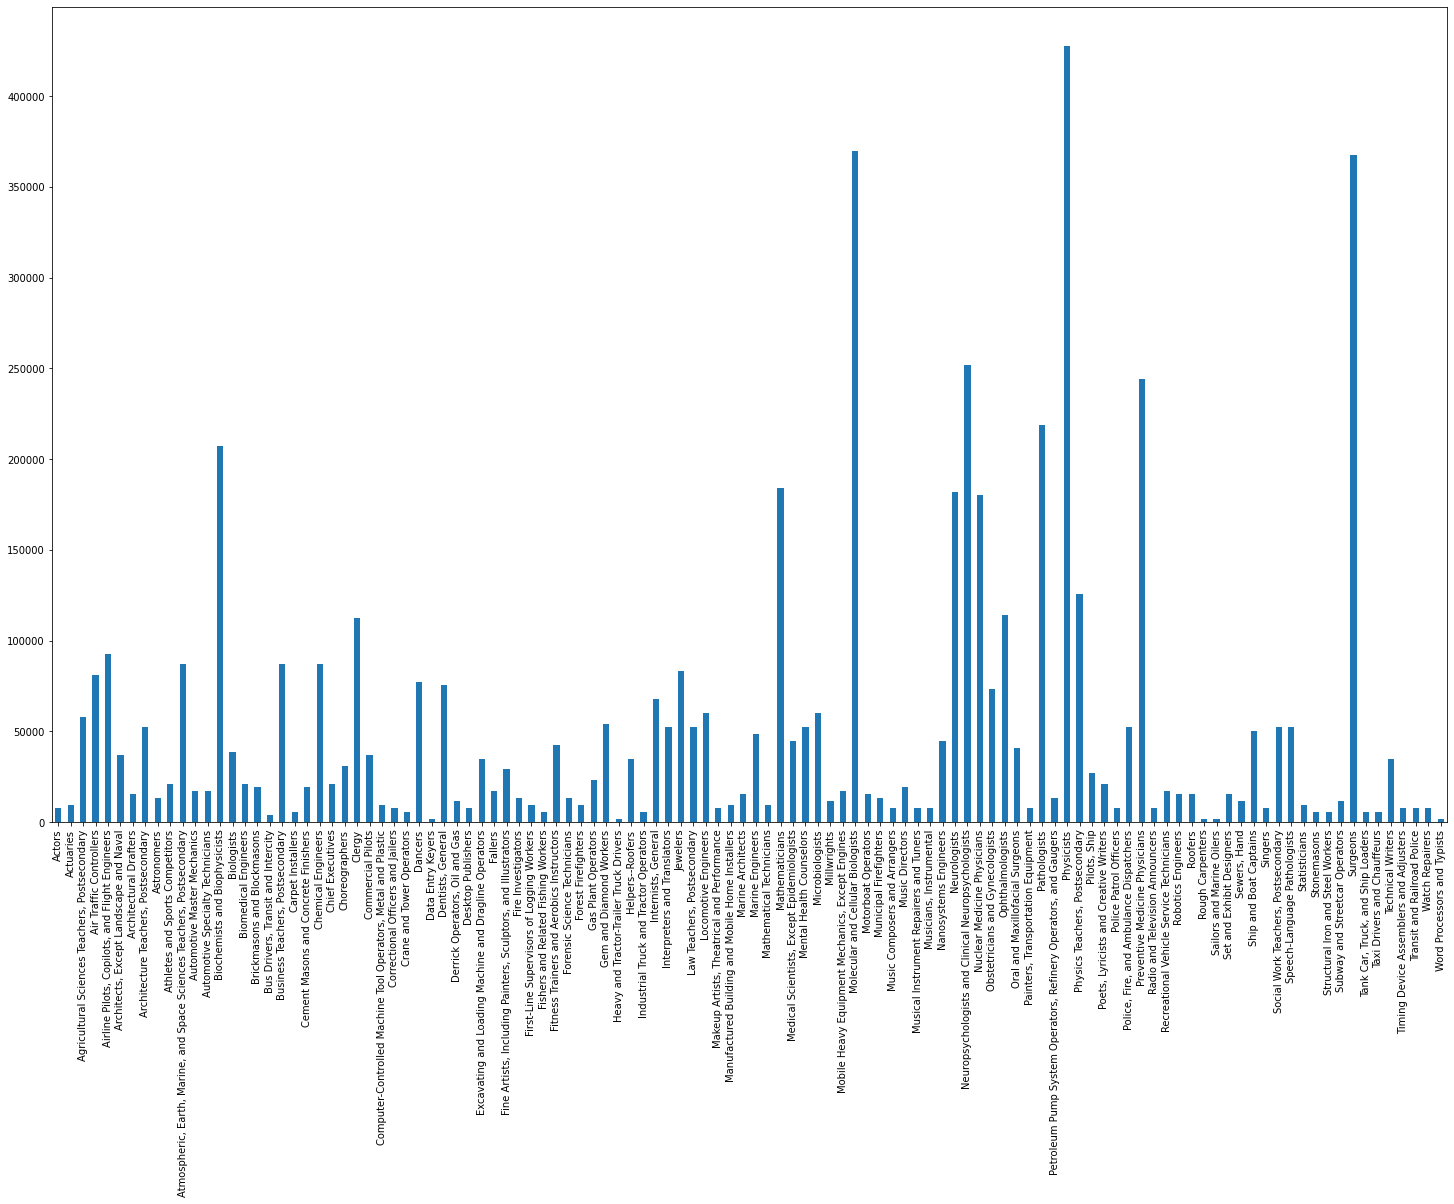

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
tes.sum(axis=0).plot.bar()

As we can see some of the Job description have high occurance than other, so our dataset is not balanced 

Removing Punctuation, converting all Higher Case alphabets into lower

In [ ]:
final['Descriptions'] = final['Descriptions'].str.replace('[/(){}\[\]\|@,;]', ' ')
final["Descriptions"] = final["Descriptions"].str.lower()
final['Descriptions'] = final['Descriptions'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>3]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
final

,Title,ElementName,DataValue,TitleCombine,Descriptions
0,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",getting information
1,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",monitor processes materials surroundings
2,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",identifying objects actions events
3,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",judging qualities things services people
4,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",processing information
...,...,...,...,...,...
1008651,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",responsible others' health safety
1008652,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",responsibility outcomes results
1008653,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",frequency conflict situations
1008654,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",deal with unpleasant angry people


In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import tensorflow as tf

In [ ]:
l=[]
for i in range(len(final["Title"])):
  l.append(i)

In [ ]:
final["Index"] = l

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final= final.set_index('Index')

In [ ]:
final

,Title,ElementName,DataValue,TitleCombine,Descriptions
Index,,,,,
0,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",getting information
1,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",monitor processes materials surroundings
2,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",identifying objects actions events
3,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",judging qualities things services people
4,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",processing information
...,...,...,...,...,...
1006715,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",responsible others' health safety
1006716,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",responsibility outcomes results
1006717,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",frequency conflict situations


In [ ]:
tokenized_sent_train = final['Descriptions'].apply(lambda x: x.split())

In [ ]:
tokenized_sent_train

Index
0                                  [getting, information]
1           [monitor, processes, materials, surroundings]
2                 [identifying, objects, actions, events]
3          [judging, qualities, things, services, people]
4                               [processing, information]
                                ...                      
1006715            [responsible, others', health, safety]
1006716               [responsibility, outcomes, results]
1006717                 [frequency, conflict, situations]
1006718           [deal, with, unpleasant, angry, people]
1006719      [deal, with, physically, aggressive, people]
Name: Descriptions, Length: 1006720, dtype: object

We need to convert getting--> get, information--> inform 

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()


In [ ]:

tokenized_sent_train= tokenized_sent_train.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
tokenized_sent_train

Index
0                                  [get, inform]
1           [monitor, process, materi, surround]
2              [identifi, object, action, event]
3          [judg, qualiti, thing, servic, peopl]
4                              [process, inform]
                           ...                  
1006715       [respons, others', health, safeti]
1006716                [respons, outcom, result]
1006717             [frequenc, conflict, situat]
1006718      [deal, with, unpleas, angri, peopl]
1006719     [deal, with, physic, aggress, peopl]
Name: Descriptions, Length: 1006720, dtype: object

In [ ]:
tokenized_sent_train[816]

['perform', 'gener', 'physic', 'activ']

In [ ]:
for i in range(len(tokenized_sent_train)):
  tokenized_sent_train[i] = ' '.join(tokenized_sent_train[i])
tokenized_sent_train

Index
0                               get inform
1          monitor process materi surround
2             identifi object action event
3          judg qualiti thing servic peopl
4                           process inform
                        ...               
1006715      respons others' health safeti
1006716              respons outcom result
1006717           frequenc conflict situat
1006718      deal with unpleas angri peopl
1006719     deal with physic aggress peopl
Name: Descriptions, Length: 1006720, dtype: object

In [ ]:
final["RefinedDescriptions"] = tokenized_sent_train

In [ ]:
final

,Title,ElementName,DataValue,TitleCombine,Descriptions,RefinedDescriptions
Index,,,,,,
0,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",getting information,get inform
1,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",monitor processes materials surroundings,monitor process materi surround
2,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",identifying objects actions events,identifi object action event
3,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",judging qualities things services people,judg qualiti thing servic peopl
4,Chief Executives,Oral Comprehension,4.50,"[Neurologists, Nuclear Medicine Physicians, Ph...",processing information,process inform
...,...,...,...,...,...,...
1006715,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",responsible others' health safety,respons others' health safeti
1006716,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",responsibility outcomes results,respons outcom result
1006717,"Tank Car, Truck, and Ship Loaders",Speech Clarity,2.88,"[Business Teachers, Postsecondary, Architectur...",frequency conflict situations,frequenc conflict situat


In [ ]:
X = final.RefinedDescriptions.values

In [ ]:
X

array(['get inform', 'monitor process materi surround',
       'identifi object action event', ..., 'frequenc conflict situat',
       'deal with unpleas angri peopl', 'deal with physic aggress peopl'],
      dtype=object)

In [ ]:
#For training
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(X)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_sequence,yJ, test_size = 0.05, random_state = 42, shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(956384, 200) (956384, 112)
(50336, 200) (50336, 112)


In [ ]:
Y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense , Dropout, Bidirectional
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 128
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=padded_sequence.shape[1]) )
model.add(SpatialDropout1D(0.25))
model.add((LSTM(100,dropout=0.5, recurrent_dropout=0.5)))

model.add(Dropout(0.2))
model.add(Dense(112, activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 128)          24960     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               91600     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 112)               11312     
Total params: 127,872
Trainable params: 127,872
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
checkpointer = ModelCheckpoint(filepath = "Sentiment.hdf5", verbose = 1, save_best_only=True)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)


In [ ]:
history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_test,Y_test),
                    epochs=1,
                    batch_size=64,
                    callbacks=[checkpointer, earlystopping])

14944/14944 [==============================] - ETA: 0s - loss: 0.1217 - accuracy: 0.0345
Epoch 00001: val_loss improved from inf to 0.11337, saving model to Sentiment.hdf5
14944/14944 [==============================] - 10564s 707ms/step - loss: 0.1217 - accuracy: 0.0345 - val_loss: 0.1134 - val_accuracy: 0.0323


Model is saved in Sentiment.hdf5 file

Test on new data

In [ ]:
text ="Determine and formulate policies and provide overall direction of companies or private and public sector organizations within guidelines set up by a board of directors or similar governing body. Plan, direct, or coordinate operational activities at the highest level of management with the help of subordinate executives and staff managers."

In [ ]:
text = text.replace('[/(){}\[\]\|@,;]', ' ')
text= text.lower()
text = [w for w in text.split() if len(w)>3]

In [ ]:
text

['determine',
 'formulate',
 'policies',
 'provide',
 'overall',
 'direction',
 'companies',
 'private',
 'public',
 'sector',
 'organizations',
 'within',
 'guidelines',
 'board',
 'directors',
 'similar',
 'governing',
 'body.',
 'plan,',
 'direct,',
 'coordinate',
 'operational',
 'activities',
 'highest',
 'level',
 'management',
 'with',
 'help',
 'subordinate',
 'executives',
 'staff',
 'managers.']

In [ ]:

t=[stemmer.stem(i) for i in text]

In [ ]:
te = " ".join(t)

In [ ]:
te

'determin formul polici provid overal direct compani privat public sector organ within guidelin board director similar govern body. plan, direct, coordin oper activ highest level manag with help subordin execut staff managers.'

In [ ]:
tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(te)
sequences = tokenizer.texts_to_sequences(te)
x_test = pad_sequences(sequences, maxlen=180)

In [ ]:
a =np.argmax(model.predict(x_test), axis=-1)

In [ ]:
a = np.unique(a)

In [ ]:
a =list(a)

In [ ]:
a

[29, 31, 50, 73, 81, 104]

a contain index of class that we need

tes is a dataFrame that contain Y

In [ ]:
tes

,Actors,Actuaries,"Agricultural Sciences Teachers, Postsecondary",Air Traffic Controllers,"Airline Pilots, Copilots, and Flight Engineers","Architects, Except Landscape and Naval",Architectural Drafters,"Architecture Teachers, Postsecondary",Astronomers,Athletes and Sports Competitors,"Atmospheric, Earth, Marine, and Space Sciences Teachers, Postsecondary",Automotive Master Mechanics,Automotive Specialty Technicians,Biochemists and Biophysicists,Biologists,Biomedical Engineers,Brickmasons and Blockmasons,"Bus Drivers, Transit and Intercity","Business Teachers, Postsecondary",Carpet Installers,Cement Masons and Concrete Finishers,Chemical Engineers,Chief Executives,Choreographers,Clergy,Commercial Pilots,"Computer-Controlled Machine Tool Operators, Metal and Plastic",Correctional Officers and Jailers,Crane and Tower Operators,Dancers,Data Entry Keyers,"Dentists, General","Derrick Operators, Oil and Gas",Desktop Publishers,Excavating and Loading Machine and Dragline Operators,Fallers,"Fine Artists, Including Painters, Sculptors, and Illustrators",Fire Investigators,First-Line Supervisors of Logging Workers,Fishers and Related Fishing Workers,...,Neurologists,Neuropsychologists and Clinical Neuropsychologists,Nuclear Medicine Physicians,Obstetricians and Gynecologists,Ophthalmologists,Oral and Maxillofacial Surgeons,"Painters, Transportation Equipment",Pathologists,"Petroleum Pump System Operators, Refinery Operators, and Gaugers",Physicists,"Physics Teachers, Postsecondary","Pilots, Ship","Poets, Lyricists and Creative Writers",Police Patrol Officers,"Police, Fire, and Ambulance Dispatchers",Preventive Medicine Physicians,Radio and Television Announcers,Recreational Vehicle Service Technicians,Robotics Engineers,Roofers,Rough Carpenters,Sailors and Marine Oilers,Set and Exhibit Designers,"Sewers, Hand",Ship and Boat Captains,Singers,"Social Work Teachers, Postsecondary",Speech-Language Pathologists,Statisticians,Stonemasons,Structural Iron and Steel Workers,Subway and Streetcar Operators,Surgeons,"Tank Car, Truck, and Ship Loaders",Taxi Drivers and Chauffeurs,Technical Writers,Timing Device Assemblers and Adjusters,Transit and Railroad Police,Watch Repairers,Word Processors and Typists
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006715,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1006716,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1006717,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1006718,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0

In [ ]:
lis = tes.columns.to_list()

In [ ]:

for i in a:
  print("Predicted Job Profiles are: ", lis[i])
  

Predicted Job Profiles are:  Dancers
Predicted Job Profiles are:  Dentists, General
Predicted Job Profiles are:  Jewelers
Predicted Job Profiles are:  Neuropsychologists and Clinical Neuropsychologists
Predicted Job Profiles are:  Physicists
Predicted Job Profiles are:  Surgeons


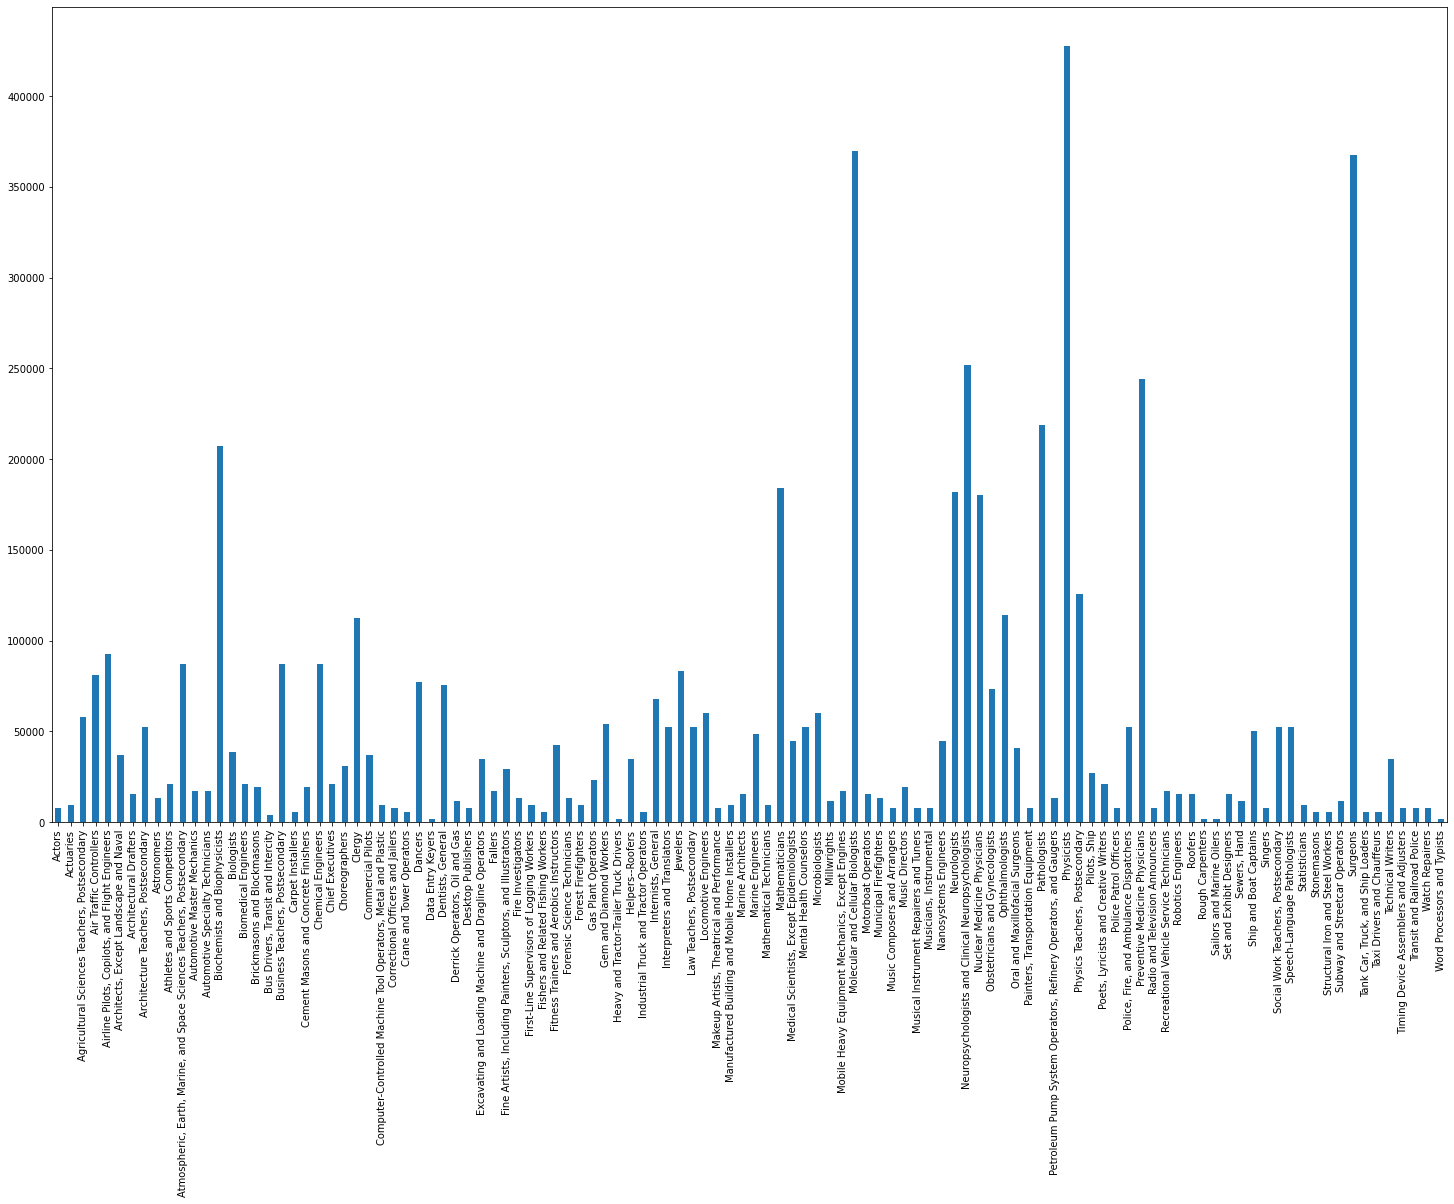

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
tes.sum(axis=0).plot.bar()

For Now model is likely to predict 'Physicitics', 'Surgeons' more often because as you can see in the bar graph these job titles are more in our datasets than other. And I had only train the model for 1 epoch so it will not perform well. After some epoch I am sure it will perform quite well.

For the skills prediction I am going to use the skills.xlsx file as database. I mean after I predict the Title now I will see the skills related to that title in the skills.xlsx file

In [ ]:
skills = pd.read_excel("/content/drive/My Drive/datasets/Dataset/Skills.xlsx")

In [ ]:
skills= skills[["Title","Element Name","Data Value"]]

In [ ]:
skills= skills.rename(columns={"Element Name":"ElementName","Data Value":"DataValue"})

In [ ]:
skills

,Title,ElementName,DataValue
0,Chief Executives,Reading Comprehension,4.12
1,Chief Executives,Reading Comprehension,4.75
2,Chief Executives,Active Listening,4.12
3,Chief Executives,Active Listening,4.88
4,Chief Executives,Writing,4.00
...,...,...,...
67755,"Tank Car, Truck, and Ship Loaders",Management of Financial Resources,1.12
67756,"Tank Car, Truck, and Ship Loaders",Management of Material Resources,2.00
67757,"Tank Car, Truck, and Ship Loaders",Management of Material Resources,1.88
67758,"Tank Car, Truck, and Ship Loaders",Management of Personnel Resources,2.88


Unique Title in skills.xlsx


In [ ]:
name1 = list(skills["Title"])
name_arr1 = np.array(name1)
final_name1 =list(np.unique(name_arr1))
final_name1

['Accountants',
 'Actors',
 'Actuaries',
 'Acupuncturists',
 'Acute Care Nurses',
 'Adapted Physical Education Specialists',
 'Adhesive Bonding Machine Operators and Tenders',
 'Administrative Law Judges, Adjudicators, and Hearing Officers',
 'Administrative Services Managers',
 'Adult Basic and Secondary Education and Literacy Teachers and Instructors',
 'Advanced Practice Psychiatric Nurses',
 'Advertising Sales Agents',
 'Advertising and Promotions Managers',
 'Aerospace Engineering and Operations Technicians',
 'Aerospace Engineers',
 'Agents and Business Managers of Artists, Performers, and Athletes',
 'Agricultural Engineers',
 'Agricultural Equipment Operators',
 'Agricultural Inspectors',
 'Agricultural Sciences Teachers, Postsecondary',
 'Agricultural Technicians',
 'Air Traffic Controllers',
 'Aircraft Cargo Handling Supervisors',
 'Aircraft Mechanics and Service Technicians',
 'Aircraft Structure, Surfaces, Rigging, and Systems Assemblers',
 'Airfield Operations Specialists'

In [ ]:
temp_skills =pd.DataFrame()

In [ ]:
gb1=skills.groupby(["Title" ])


I am going to predict only top 6 skills for a given title. Top 6 is determine by data Value

In [ ]:
N = 6
lis1=[]
for i in final_name1:
  l=[]
  arr = list(gb1.get_group(str(i))["ElementName"])
  data=list(gb1.get_group(str(i))["DataValue"])
  resp = sorted(range(len(data)), key = lambda sub: data[sub])[-N:]
  for i in range(len(resp)):
    tempN = arr[resp[0]]
    resp.pop(0)
    l.append(tempN)
  lis1.append(" ".join(l))



In [ ]:
temp_skills["Title"] = final_name1
temp_skills["ElementName"] =lis1

In [ ]:
for i in a:
  a =lis[i]
  print("Predicted Job Profiles are: ", a)
  print("Skills are: ", temp_skills["ElementName"][temp_skills[temp_skills["Title"]== a].index.values[0]])
  

Predicted Job Profiles are:  Dancers
Skills are:  Critical Thinking Monitoring Social Perceptiveness Coordination Active Listening Coordination
Predicted Job Profiles are:  Dentists, General
Skills are:  Complex Problem Solving Judgment and Decision Making Judgment and Decision Making Critical Thinking Active Learning Reading Comprehension
Predicted Job Profiles are:  Jewelers
Skills are:  Time Management Operations Analysis Judgment and Decision Making Negotiation Judgment and Decision Making Quality Control Analysis
Predicted Job Profiles are:  Neuropsychologists and Clinical Neuropsychologists
Skills are:  Active Listening Critical Thinking Active Listening Active Learning Reading Comprehension Social Perceptiveness
Predicted Job Profiles are:  Physicists
Skills are:  Writing Learning Strategies Mathematics Active Learning Science Reading Comprehension
Predicted Job Profiles are:  Surgeons
Skills are:  Complex Problem Solving Active Listening Critical Thinking Judgment and Decision 